In [2]:
import glob
import os
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from collections import Counter
import yaml

In [33]:
RES_DIRECTORIES = sorted(glob.iglob("/media/vito/scanpath_backup/scanpath_results_current/*"))[::-1]

cols = ["name", "dur_mean", "dur_median", "amp_mean", "amp_median", 'decision_noise', 'decision_threshold', 'sensitivity_dva_sigma', "center_bias", 'saccadic_momentum', 'sac_momentum_min', 'use_uncertainty_in_gaze_evidences',]
df_overview = pd.DataFrame()

for RES_DIR in RES_DIRECTORIES:
    config_name = RES_DIR.split("/")[-1][19:]
    print(RES_DIR, config_name)
    
    df_res = pd.read_csv(os.path.join(RES_DIR, "df_res_fov.csv"))
    with open(os.path.join(RES_DIR, 'config_0/-2HFZjPOCMk', 'config.yaml'), 'r') as file:
        config = yaml.load(file, Loader=yaml.BaseLoader)
    df_conf = pd.json_normalize(config)
    df_conf["dur_mean"] = df_res.duration_ms.mean()
    df_conf["dur_median"] = df_res.duration_ms.median()
    df_conf["amp_mean"] = df_res.sac_amp_dva.mean()
    df_conf["amp_median"] = df_res.sac_amp_dva.median()
    df_conf["name"] = config_name[1:]
    if "center_bias" not in df_conf.columns:
        df_conf["center_bias"] = "False"

    
    df_overview = pd.concat([df_overview, df_conf[cols]])

/media/vito/scanpath_backup/scanpath_results_current/2023-12-10-13-21-31_no_cb_sacmo_dv375_sig02 _no_cb_sacmo_dv375_sig02
/media/vito/scanpath_backup/scanpath_results_current/2023-12-10-03-23-26_cb_no_sacmo_dv3_no_presac _cb_no_sacmo_dv3_no_presac
/media/vito/scanpath_backup/scanpath_results_current/2023-12-09-18-32-41_cb_no_sacmo_dv3_no_prompt _cb_no_sacmo_dv3_no_prompt
/media/vito/scanpath_backup/scanpath_results_current/2023-12-09-09-57-40_cb_no_sacmo_dv3_no_topdown _cb_no_sacmo_dv3_no_topdown
/media/vito/scanpath_backup/scanpath_results_current/2023-12-09-00-21-32_cb_no_sacmo_dv3_no_bottomup _cb_no_sacmo_dv3_no_bottomup
/media/vito/scanpath_backup/scanpath_results_current/2023-12-08-14-22-51_cb_no_sacmo_dv3 _cb_no_sacmo_dv3
/media/vito/scanpath_backup/scanpath_results_current/2023-12-07-08-59-30_cb_no_sacmo_dv3_sig1 _cb_no_sacmo_dv3_sig1
/media/vito/scanpath_backup/scanpath_results_current/2023-12-07-03-56-10_cb_no_sacmo_dv35_sig1 _cb_no_sacmo_dv35_sig1
/media/vito/scanpath_backup/

In [34]:
df_overview

,name,dur_mean,dur_median,amp_mean,amp_median,decision_noise,decision_threshold,sensitivity_dva_sigma,center_bias,saccadic_momentum,sac_momentum_min,use_uncertainty_in_gaze_evidences
0,no_cb_sacmo_dv375_sig02,369.219835,332.173773,3.134351,2.442095,0.2,3.75,6.0,false,true,0.25,true
0,cb_no_sacmo_dv3_no_presac,397.130473,320.632547,3.596139,2.737222,0.3,3.0,6.0,true,false,0.25,true
0,cb_no_sacmo_dv3_no_prompt,301.025593,245.630970,2.806157,1.975577,0.3,3.0,6.0,true,false,0.25,true
0,cb_no_sacmo_dv3_no_topdown,267.678497,225.349130,2.741868,1.911742,0.3,3.0,6.0,true,false,0.25,true
0,cb_no_sacmo_dv3_no_bottomup,352.174138,297.606277,3.555165,2.500939,0.3,3.0,6.0,true,false,0.25,true
0,cb_no_sacmo_dv3,397.137833,320.632547,3.593283,2.737222,0.3,3.0,6.0,true,false,0.25,true
0,cb_no_sacmo_dv3_sig1,485.505274,374.374993,2.855311,2.076849,0.1,3.0,6.0,true,false,0.25,true
0,cb_no_sacmo_dv35_sig1,643.741516,495.213866,3.184577,2.452605,0.1,3.5,6.0,true,false,0.25,true
0,cb_no_sacmo_dv3,394.893277,320.209889,3.635543,2.748143,0.3,3.0,6.0,true,false,0.25,true
0,cb_no_sacmo_dv35,527.135543,416.924615,4.043724,2.934749,0.3,3.5,6.0,true,false,0.25,true


In [85]:
def angle_limits(angle):
    """
    Makes sure that a given angle is within the range of -180<angle<=180

    :param angle: Angle to be tested / converted
    :type angle: float
    :return: angle with -180 < angle <= 180
    :rtype: float
    """
    if -180 < angle <= 180:
        return angle
    elif angle > 180:
        return angle - 360
    else:
        return angle + 360


def calc_px2dva(image_size, display_size=(1080, 1920), display_w_dva=47.7, max_scaling=0.8):
    px2dva_unscaled = display_w_dva / display_size[1]
    if display_size[1] / display_size[0] > image_size[1] / image_size[0]:
        # display is wider than image -> limit by height
        movie_scale_factor = display_size[0] * max_scaling / image_size[0]
    else:
        # display is taller than image -> limit by width
        movie_scale_factor = display_size[1] * max_scaling / image_size[1]
    return px2dva_unscaled * movie_scale_factor


def load_objectmasks(videoname, path="/media/vito/TOSHIBA EXT/scanpath_data"):
    """
    Function that loads the object masks from a given path and returns them as a
    list of numpy arrays.

    :param videoname: Name of the Video
    :type videoname: str
    :param path: Path to the object masks
    :type path: str
    :return: List of object masks
    :rtype: list

    """
    objectmasks = []
    for mask in sorted(glob.glob(os.path.join(path, videoname, "mask", "*.png"))):
        # read in the mask with cv2 as grayscale and append it to the list
        objectmasks.append(cv2.imread(mask, cv2.IMREAD_GRAYSCALE))
    return objectmasks

def object_at_position(segmentationmap, xpos, ypos, radius=None):
    """
    Function that returns the currently gazed object with a tolerance (radius)
    around the gaze point. If the gaze point is on the background but there are
    objects within the radius, it is not considered to be background.

    :param segmentationmap: Object segmentation of the current frame
    :type segmentationmap: np.array
    :param xpos: Gaze position in x direction
    :type xpos: int
    :param ypos: Gaze position in y direction
    :type ypos: int
    :param radius: Tolerance radius, objects within that distance of the gaze point
        are considered to be foveated, defaults to None
    :type radius: float, optional
    :return: Name of the object(s) at the given position / within the radius
    :rtype: str
    """
    (h, w) = segmentationmap.shape
    if radius == None:
        objid = segmentationmap[ypos, xpos]
        if objid == 0:
            objname = "Ground"
        else:
            objname = f"Object {objid}"
        return objname
    # more interesting case: check in radius!
    else:
        center_objid = segmentationmap[ypos, xpos]
        if center_objid > 0:
            return f"Object {center_objid}"
        # check if all in rectangle is ground, then no need to draw a circle
        elif (
            np.sum(
                segmentationmap[
                    max(0, int(ypos - radius)) : min(h - 1, int(ypos + radius)),
                    max(0, int(xpos - radius)) : min(w - 1, int(xpos + radius)),
                ]
            )
            == 0
        ):
            return "Ground"
        # Do computationally more demanding check for a radius
        # store all objects other than `Ground` that lie within the radius
        else:
            Y, X = np.ogrid[:h, :w]
            dist_from_center = np.sqrt((X - xpos) ** 2 + (Y - ypos) ** 2)
            mask = dist_from_center <= radius
            objects = np.unique(mask * segmentationmap)
            if len(objects) == 1 and 0 in objects:
                return "Ground"
            else:
                return ", ".join([f"Object {obj}" for obj in objects if (obj > 0)])


def evaluate_trial(res_file_path, segmentation_masks=None, RADIUS_OBJ_GAZE_DVA=0.5, swap_xy=False):
    """
    Function that evaluates the results of one trial and returns a dataframe
    with the results.

    :param res_file_path: Path to the result file
    :type res_file_path: str
    :return: Dataframe with the results
    :rtype: pd.DataFrame    
    """
    # first do all trials of one video
    runname = res_file_path.split("/")[-3].split("_")[-1]
    videoname = res_file_path.split("/")[-2]
    if segmentation_masks is None:
        segmentation_masks = load_objectmasks(videoname)
    # get the pixel radius for the object tolerance
    if RADIUS_OBJ_GAZE_DVA is not None:
        px_obj_radius = RADIUS_OBJ_GAZE_DVA * calc_px2dva(segmentation_masks[0].shape)
    
    # load the result file
    with open(res_file_path, "rb") as f:
        raw_results = pickle.load(f)
        df = raw_results[1]
        gaze_data = np.array(raw_results[0], int)
    
    # TODO comment out for new runs (bug is fixed in scanpath_producer)
    if swap_xy:
        df.rename(columns={"x_start":"y_start", "y_start":"x_start", "x_end":"y_end", "y_end":"x_end"}, inplace=True)
    # df = pd.read_csv(res_file[1], index_col=0)
    N_fov = len(df)
    df.insert(1, "video", videoname)
    df.insert(2, "subject", runname)
    
    # TODO: Problem(?) this says '' if majority of fov does not have a GT obj mask 
    df["gt_object"] = [
        Counter(
            ", ".join(
                [
                    # get all foveated objects in this foveation
                    # with tolerance of 1 dva (as for the human eye tracking data)
                    object_at_position(
                        segmentation_masks[f_i],
                        gaze_data[f_i][1],
                        gaze_data[f_i][0],
                        radius=px_obj_radius,
                    ) if f_i < len(segmentation_masks) else ''
                    for f_i in range(
                        df["frame_start"].iloc[n], df["frame_end"].iloc[n] + 1 
                    )
                ]
            ).split(", ")
        ).most_common(1)[0][0]
        for n in range(N_fov)
    ]
    
    # calculate a number of saccade properties based on the gaze shift
    # depending on the end of the current fov and beginning of next one
    diff = np.array(
        [
            np.array((df["x_start"][i + 1], df["y_start"][i + 1])) - np.array((df["x_end"][i], df["y_end"][i]))
            for i in range(N_fov - 1)
        ]
    )
    # avoid error if no saccades are made
    if diff.size:
        df["sac_angle_h"] = [np.nan] + list(
            np.arctan2(diff[:, 1], diff[:, 0]) / np.pi * 180
        )
        # second entry of angle_p will also be nan since first angle_h is nan
        df["sac_angle_p"] = [np.nan] + [
            angle_limits(df["sac_angle_h"][i + 1] - df["sac_angle_h"][i])
            for i in range(N_fov - 1)
        ]
    else:
        df["sac_amp_eval"] = [np.nan]
        df["sac_angle_h"] = [np.nan]
        df["sac_angle_p"] = [np.nan]
    
    # add start and end time of each foveation
    df["fov_end"] = (df["duration_ms"] + df["sac_dur"]).cumsum()
    df["fov_start"] = df["fov_end"] - df["duration_ms"]
    
    # calculate the foveation categories (Background, Detection, Inspection, Revisit)
    fov_categories = []
    ret_times = np.zeros(N_fov) * np.nan
    for n in range(N_fov):
        obj = df["gt_object"].iloc[n]
        if obj == "":
            fov_categories.append("-")
        elif obj == "Ground":
            fov_categories.append("B")
        elif (n > 0) and (df["gt_object"].iloc[n - 1] == obj):
            fov_categories.append("I")
        else:
            prev_obj = df["gt_object"].iloc[:n]
            if obj not in prev_obj.values:
                fov_categories.append("D")
            else:
                fov_categories.append("R")
                return_prev_t = df["fov_end"][
                    prev_obj.where(prev_obj == obj).last_valid_index()
                ]
                # store time difference [in milliseconds] in array!
                ret_times[n] = (
                    (df["fov_start"].iloc[n] - return_prev_t)
                )
    df["fov_category"] = fov_categories
    df["ret_times"] = ret_times
    return df

In [86]:

def plot_fd_sa_hists(df, min_amp=0.5, colors=["xkcd:green", "xkcd:green"]):
    """ 
    Function that plots the foveation duration and saccade amplitude distributions
    of the given dataframe.

    :param df: Dataframe with the results
    :type df: pd.DataFrame
    """
    gt_amp_dva = df["sac_amp_dva"].dropna().values
    if min_amp is not None:
        gt_amp_dva = gt_amp_dva[gt_amp_dva > min_amp]
    gt_dur_ms = df["duration_ms"].dropna().values

    fig, axs = plt.subplots(1,2,dpi=150, figsize=(9.5,3), sharey=True)
    sns.histplot(data=np.log10(gt_dur_ms), kde=False, ax=axs[0], bins=40, color=colors[0])
    axs[0].set_xticks([1,2,3,4])
    axs[0].set_xticklabels([10,100,1000,10000])
    axs[0].set_xlabel('Foveation duration [ms]', size=14)
    axs[0].set_ylabel('Count', size=14)
    bins = np.linspace(0, 50, 50)
    sns.histplot(data=gt_amp_dva, kde=False, ax=axs[1], bins=bins, color=colors[1])
    axs[1].set_xlabel('Saccade amplitude [dva]', size=14)
    axs[1].set_xlim([0, 50])
    axs[0].tick_params(labelsize=12)
    axs[1].tick_params(labelsize=12)
    sns.despine()
    plt.tight_layout(); plt.show()

def plot_sac_ang_hists(df, ang_bins=30, colors=["xkcd:green", "xkcd:green"]):
    fig, axs = plt.subplots(1,2,dpi=150, figsize=(7,3), subplot_kw={'projection': 'polar'})
    hori_ang = -df["sac_angle_h"].dropna().values
    prev_ang = -df["sac_angle_p"].dropna().values
    axs[0].hist(hori_ang/180*np.pi, ang_bins, density=True, color=colors[0])
    axs[0].set_xticklabels(["", "45°", "", "135°", "", "-135°", "", "-45°"]) 
    axs[1].hist(prev_ang/180*np.pi, ang_bins, density=True, color=colors[1])
    axs[1].set_xticklabels(["", "45°", "", "135°", "", "-135°", "", "-45°"]) 



def fovdur_vs_sacang(df_orig, num_bins, sma_ws):
    """Prepares the data for the figure showing the relationship between saccade angle and binned foveation duration.

    :param df_orig: Original foveation dataframe (GT or SIM)
    :type df_orig: pandas.DataFrame
    :param num_bins: Number of bins to use for the saccade angle
    :type num_bins: int
    :param sma_ws: simple moving average window size
    :type sma_ws: int
    :return: List containing the x values (saccade angle bins) and the y values (mean foveation duration)
    :rtype: list
    """
    df = df_orig.copy()
    bins = np.linspace(-180, 180, num_bins + 1)
    x_vals = (bins[:-1] + bins[1:]) / 2

    ret = [x_vals]

    df['next_sac_ang_p'] = -1 * df['sac_angle_p'].shift(-1)
    df = df.dropna(subset=['next_sac_ang_p'])
    df['angle_bin'] = pd.cut(df['next_sac_ang_p'], bins=bins, labels=False)
    agg_df = df.groupby('angle_bin').agg({'duration_ms': ['median', 'std']})
    agg_df.columns = ['mean_duration', 'std_duration']
    agg_df.reset_index(inplace=True)
    agg_df = agg_df.append(agg_df.assign(angle_bin=agg_df['angle_bin'] + num_bins)).append(agg_df.assign(angle_bin=agg_df['angle_bin'] - num_bins))
    agg_df = agg_df.sort_values(by='angle_bin')
    agg_df[['mean_duration', 'std_duration']] = agg_df[['mean_duration', 'std_duration']].rolling(sma_ws, center=True).mean()
    agg_df = agg_df.iloc[num_bins:2*num_bins]
    ret.append(agg_df['mean_duration'])
    return ret # x_vals, agg_df['mean_duration']


def plot_FDvSA_ret(df, cutoff_t=3000, ret_bins=45, ang_bins=30, sma_ws=5, colors=["xkcd:green", "xkcd:green"]):
    fig, axs = plt.subplots(1,2,dpi=150, figsize=(8,3), sharey=False) 

    x_vals, all = fovdur_vs_sacang(df, ang_bins, sma_ws)
    axs[0].plot(x_vals, all, color=colors[0], lw=3)
    axs[0].set_xlabel('Change in saccade direction [°]', size=13)
    axs[0].set_xlim(-180, 180)
    # axs[0].set_yticks([200, 300, 400, 500, 600])
    axs[0].set_xticks([-180, -90, 0, 90, 180])
    axs[0].set_ylabel('Foveation duration [ms]', size=13)
    axs[0].tick_params(labelsize=12)

    bins = np.linspace(0, cutoff_t, ret_bins)
    counts, bins = np.histogram(df["ret_times"].dropna().values, bins)
    Nsac = len(df["sac_amp_dva"].dropna())
    axs[1].plot((bins[1:] + bins[:-1])/2, counts/Nsac, color=colors[1], lw=3)        
    axs[1].set_xlabel('Return time [ms]', size=13)
    axs[1].set_ylabel('Percentage of saccades', size=13) # Density
    # axs[1].set_yticks([0, 0.01, 0.02, 0.03])
    # axs[1].set_yticklabels([0, 1, 2, 3])
    axs[1].tick_params(labelsize=12)

    sns.despine(fig); fig.tight_layout(); plt.show()

In [88]:
RES_DIR = sorted(glob.iglob("/media/vito/TOSHIBA EXT/scanpath_results/*"))[-1]
res_files = []

for path, subdirs, files in os.walk(RES_DIR):
    for name in files:
        if name == "raw_results.pickle4":
            res_files.append(os.path.join(path, name))
            
print("#Trials in simulation run: ", len(res_files))

#Trials in simulation run:  1


In [69]:
df = pd.concat([evaluate_trial(res, swap_xy=True) for res in res_files], ignore_index=True)
df

,nfov,video,subject,frame_start,frame_end,duration_ms,y_start,x_start,y_end,x_end,sac_amp_dva,sac_dur,gt_object,sac_angle_h,sac_angle_p,fov_end,fov_start,fov_category,ret_times
0,0,-2HFZjPOCMk,0,0,4,161.525485,112.0,587.0,115.1629,589.3722,NaN,0.000000,Ground,NaN,NaN,161.525485,0.000000,B,NaN
1,1,-2HFZjPOCMk,0,6,13,255.319586,151.0,418.0,157.03638,358.0764,6.263458,39.911338,Ground,168.188602,NaN,456.756408,201.436822,B,NaN
2,2,-2HFZjPOCMk,0,14,18,127.798136,215.0,197.0,200.39633,174.1257,6.124256,39.535492,Object 1,160.208642,-7.979960,624.090035,496.291900,D,NaN
3,3,-2HFZjPOCMk,0,20,26,202.296294,433.0,21.0,431.1344,26.0249,9.962676,49.899224,Ground,123.357375,-36.851267,876.285554,673.989260,B,NaN
4,4,-2HFZjPOCMk,0,27,31,132.123495,259.0,235.0,255.49303,236.97882,9.685769,49.151578,Object 1,-39.478546,-162.835922,1057.560627,925.437132,R,301.347096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,47,07YX_GR_cEE,7,272,276,122.320872,196.0,212.0,230.36693,203.45857,1.888849,28.099893,,144.557451,-97.228322,9207.065016,9084.744144,-,NaN
48,48,07YX_GR_cEE,7,277,281,143.453414,167.0,351.0,155.99063,361.53006,4.035960,33.897091,,-23.242830,-167.800280,9384.415522,9240.962108,-,NaN
49,49,07YX_GR_cEE,7,282,287,157.560186,214.0,179.0,215.09142,180.45824,4.813948,35.997659,,162.369368,-174.387802,9577.973366,9420.413181,-,NaN
50,50,07YX_GR_cEE,7,288,292,143.396040,182.0,279.0,182.84392,281.81787,2.612738,30.054393,,-18.562621,179.068010,9751.423799,9608.027759,-,NaN


/tmp/ipykernel_9640/3431194421.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  agg_df = agg_df.append(agg_df.assign(angle_bin=agg_df['angle_bin'] + num_bins)).append(agg_df.assign(angle_bin=agg_df['angle_bin'] - num_bins))


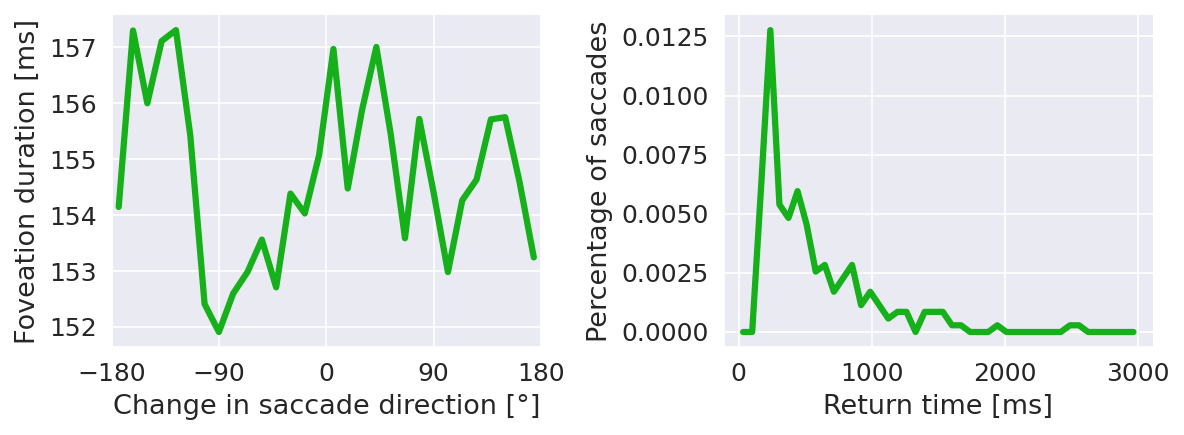

In [82]:
plot_FDvSA_ret(df)

In [83]:
df

,nfov,video,subject,frame_start,frame_end,duration_ms,y_start,x_start,y_end,x_end,sac_amp_dva,sac_dur,gt_object,sac_angle_h,sac_angle_p,fov_end,fov_start,fov_category,ret_times
0,0,-2HFZjPOCMk,0,0,4,161.525485,112.0,587.0,115.1629,589.3722,NaN,0.000000,Ground,NaN,NaN,161.525485,0.000000,B,NaN
1,1,-2HFZjPOCMk,0,6,13,255.319586,151.0,418.0,157.03638,358.0764,6.263458,39.911338,Ground,168.188602,NaN,456.756408,201.436822,B,NaN
2,2,-2HFZjPOCMk,0,14,18,127.798136,215.0,197.0,200.39633,174.1257,6.124256,39.535492,Object 1,160.208642,-7.979960,624.090035,496.291900,D,NaN
3,3,-2HFZjPOCMk,0,20,26,202.296294,433.0,21.0,431.1344,26.0249,9.962676,49.899224,Ground,123.357375,-36.851267,876.285554,673.989260,B,NaN
4,4,-2HFZjPOCMk,0,27,31,132.123495,259.0,235.0,255.49303,236.97882,9.685769,49.151578,Object 1,-39.478546,-162.835922,1057.560627,925.437132,R,301.347096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,47,07YX_GR_cEE,7,272,276,122.320872,196.0,212.0,230.36693,203.45857,1.888849,28.099893,,144.557451,-97.228322,9207.065016,9084.744144,-,NaN
48,48,07YX_GR_cEE,7,277,281,143.453414,167.0,351.0,155.99063,361.53006,4.035960,33.897091,,-23.242830,-167.800280,9384.415522,9240.962108,-,NaN
49,49,07YX_GR_cEE,7,282,287,157.560186,214.0,179.0,215.09142,180.45824,4.813948,35.997659,,162.369368,-174.387802,9577.973366,9420.413181,-,NaN
50,50,07YX_GR_cEE,7,288,292,143.396040,182.0,279.0,182.84392,281.81787,2.612738,30.054393,,-18.562621,179.068010,9751.423799,9608.027759,-,NaN


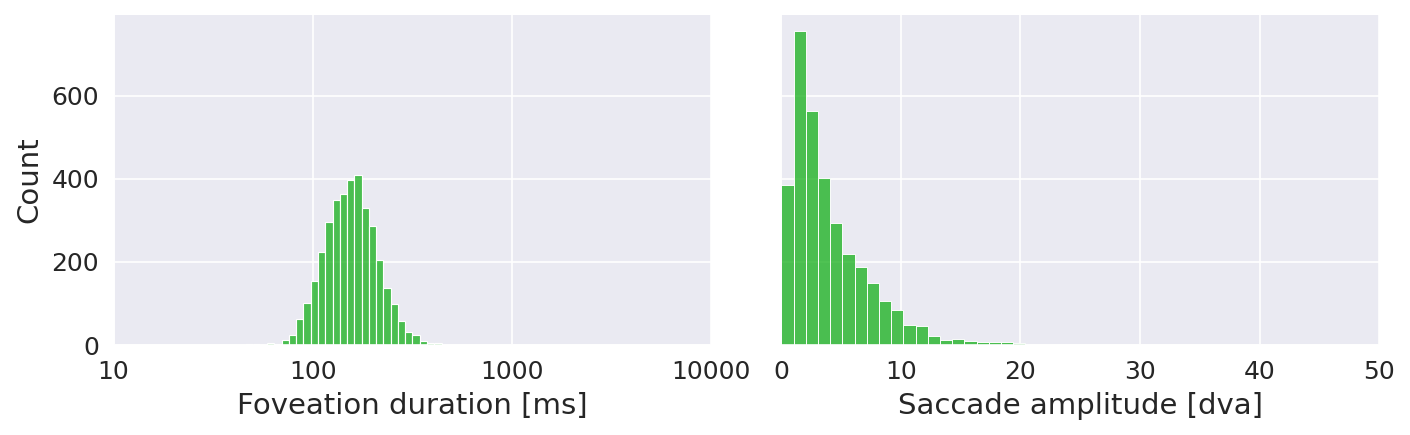

In [72]:
plot_fd_sa_hists(df)

/tmp/ipykernel_9640/1149426867.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(["", "45°", "", "135°", "", "-135°", "", "-45°"])
/tmp/ipykernel_9640/1149426867.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(["", "45°", "", "135°", "", "-135°", "", "-45°"])


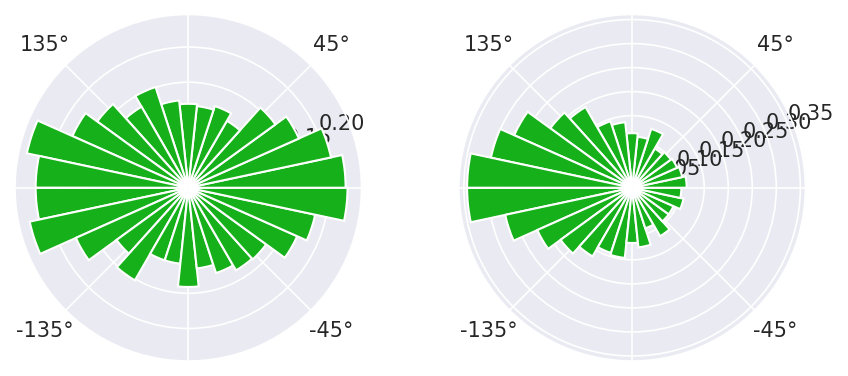

In [74]:
plot_sac_ang_hists(df)